### Supervised Learning Analysis: canonical and modified training

#### All covered kmer training
After 30 rounds of supervised training using 500 reads of native yeast rRNA. This notebook looks at the training comparison of keeping canonical covered distributions static vs letting them be altered.


In [1]:
import os
import numpy as np
from py3helpers.aws import AwsS3
from rrna_analysis.plot_experiment_table import plot_acc_heatmap_for_experiment
from rrna_analysis.multiple_model_accuracy import plot_accuracy_vs_delta_and_accuracy_over_time, preprocess_accuracy_csv
from rrna_analysis.kmer_pos_mapping import KmerPosMapping

mods_csv = "/Users/andrewbailey/CLionProjects/rrna_analysis/reference/mod_files/mod_file.csv"
reference = "/Users/andrewbailey/CLionProjects/rrna_analysis/reference/yeast_25S_18S.fa"
positions = "/Users/andrewbailey/CLionProjects/rrna_analysis/reference/mod_files/yeast_18S_25S_variants.positions"
kpm = KmerPosMapping(reference, positions, mods_csv)
client = AwsS3()


Enter MFA code for arn:aws:iam::652235167018:mfa/andbaile@ucsc.edu: ········


In [5]:
model_n = 30
# key="accuracy"
key="recall"
# key="specificity"
# key="precision"
# key="negative_predictive_value"
# key="brier_score"
# key="f1_score"

max_percent=100
min_percent=90
min_delta=6
max_delta=np.inf

_60_rounds="/Users/andrewbailey/CLionProjects/rrna_analysis/notebooks/rrna_data/rrna_kube_testing/supervised/gaussian_distribution_testing/train_500_test_500_prob_0.5_em_iterations_60_USE_MEDIAN_false_MIN_SD_0"
_ivt_and_native="/Users/andrewbailey/CLionProjects/rrna_analysis/notebooks/rrna_data/rrna_kube_testing/supervised/ivt_and_native_training/train_500_test_500_prob_0.5_em_iterations_30_all_kmers_ivt_and_native_training"
# _median="/Users/andrewbailey/CLionProjects/rrna_analysis/notebooks/rrna_data/rrna_kube_testing/supervised/gaussian_distribution_testing/train_500_test_500_prob_0.5_em_iterations_30_USE_MEDIAN_true_MIN_SD_0"
_30_rounds="/Users/andrewbailey/CLionProjects/rrna_analysis/notebooks/rrna_data/rrna_kube_testing/supervised/gaussian_distribution_testing/train_500_test_500_prob_0.5_em_iterations_30_USE_MEDIAN_false_MIN_SD_0"
_native_all_kmers="/Users/andrewbailey/CLionProjects/rrna_analysis/notebooks/rrna_data/rrna_kube_testing/supervised/only_covered_kmers_training/train_500_test_500_prob_0.5_em_iterations_30_all_kmers"
top_dirs = [_30_rounds, _native_all_kmers, _ivt_and_native]
round_n = 30
overwrite=False
# top_dirs = [_30_rounds,
#             _60_rounds]
# round_n = [30, 60]


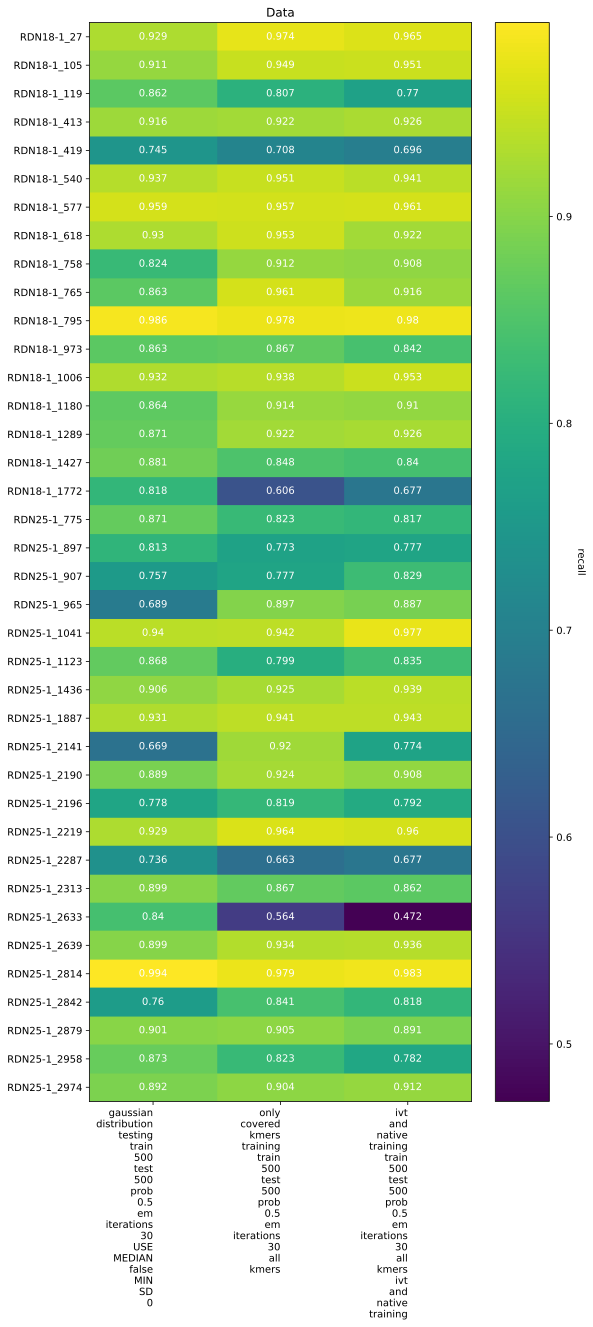

In [6]:
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
%matplotlib inline
set_matplotlib_formats('svg')
plot_acc_heatmap_for_experiment(top_dirs, key, kpm, max_percent=max_percent, min_percent=min_percent, min_delta=min_delta, max_delta=max_delta, round_n=round_n, show_numbers=True, client=client, overwrite=overwrite)

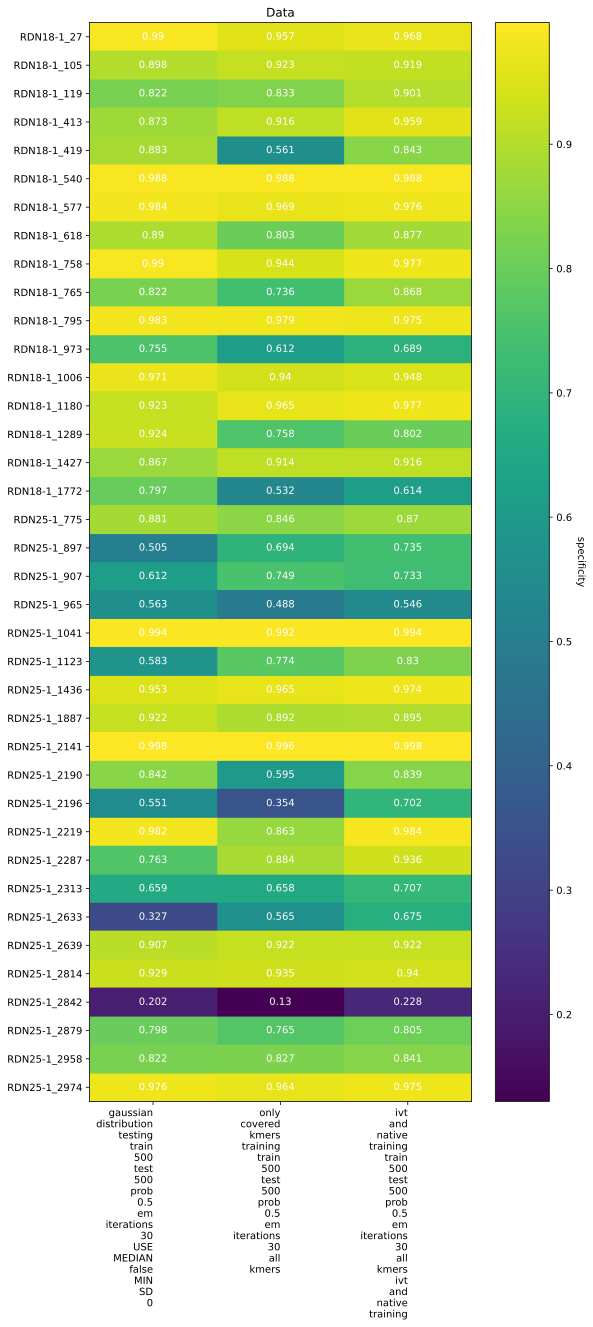

In [7]:
plot_acc_heatmap_for_experiment(top_dirs, "specificity", kpm, max_percent=max_percent, min_percent=90, min_delta=min_delta, max_delta=max_delta, round_n=round_n, show_numbers=True, client=client, overwrite=overwrite)

In [19]:
model_n = 30
# key="accuracy"
key="recall"
# key="specificity"
# key="precision"
# key="negative_predictive_value"
# key="brier_score"
# key="f1_score"

max_percent=100
min_percent=0
min_delta=0
max_delta=np.inf

_60_rounds="/Users/andrewbailey/CLionProjects/rrna_analysis/notebooks/rrna_data/rrna_kube_testing/supervised/gaussian_distribution_testing/train_500_test_500_prob_0.5_em_iterations_60_USE_MEDIAN_false_MIN_SD_0"
_ivt_and_native="/Users/andrewbailey/CLionProjects/rrna_analysis/notebooks/rrna_data/rrna_kube_testing/supervised/ivt_and_native_training/train_500_test_500_prob_0.5_em_iterations_30_all_kmers_ivt_and_native_training"
_30_rounds="/Users/andrewbailey/CLionProjects/rrna_analysis/notebooks/rrna_data/rrna_kube_testing/supervised/gaussian_distribution_testing/train_500_test_500_prob_0.5_em_iterations_30_USE_MEDIAN_false_MIN_SD_0"
_native_all_kmers="/Users/andrewbailey/CLionProjects/rrna_analysis/notebooks/rrna_data/rrna_kube_testing/supervised/only_covered_kmers_training/train_500_test_500_prob_0.5_em_iterations_30_all_kmers"
_acc_csv_1 = "/Volumes/gdrive/rrna_kube_testing/supervised/probability_sweep/train_500_test_500_prob_0.1_em_iterations_30/"
_acc_csv_25 = "/Volumes/gdrive/rrna_kube_testing/supervised/probability_sweep/train_500_test_500_prob_0.25_em_iterations_30/"
_acc_csv_5 = "/Volumes/gdrive/rrna_kube_testing/supervised/probability_sweep/train_500_test_500_prob_0.5_em_iterations_30/"
_acc_csv_75 = "/Volumes/gdrive/rrna_kube_testing/supervised/probability_sweep/train_500_test_500_prob_0.75_em_iterations_30/"
_acc_csv_9 = "/Volumes/gdrive/rrna_kube_testing/supervised/probability_sweep/train_500_test_500_prob_0.9_em_iterations_30/"

top_dirs = [_acc_csv_1, _acc_csv_25, _acc_csv_5, _acc_csv_75, _acc_csv_9, _30_rounds, _native_all_kmers, _ivt_and_native]
# top_dirs = ["/Volumes/gdrive/rrna_kube_testing/supervised"]

round_n = 30
overwrite=False
# top_dirs = [_30_rounds,
#             _60_rounds]
# round_n = [30, 60]


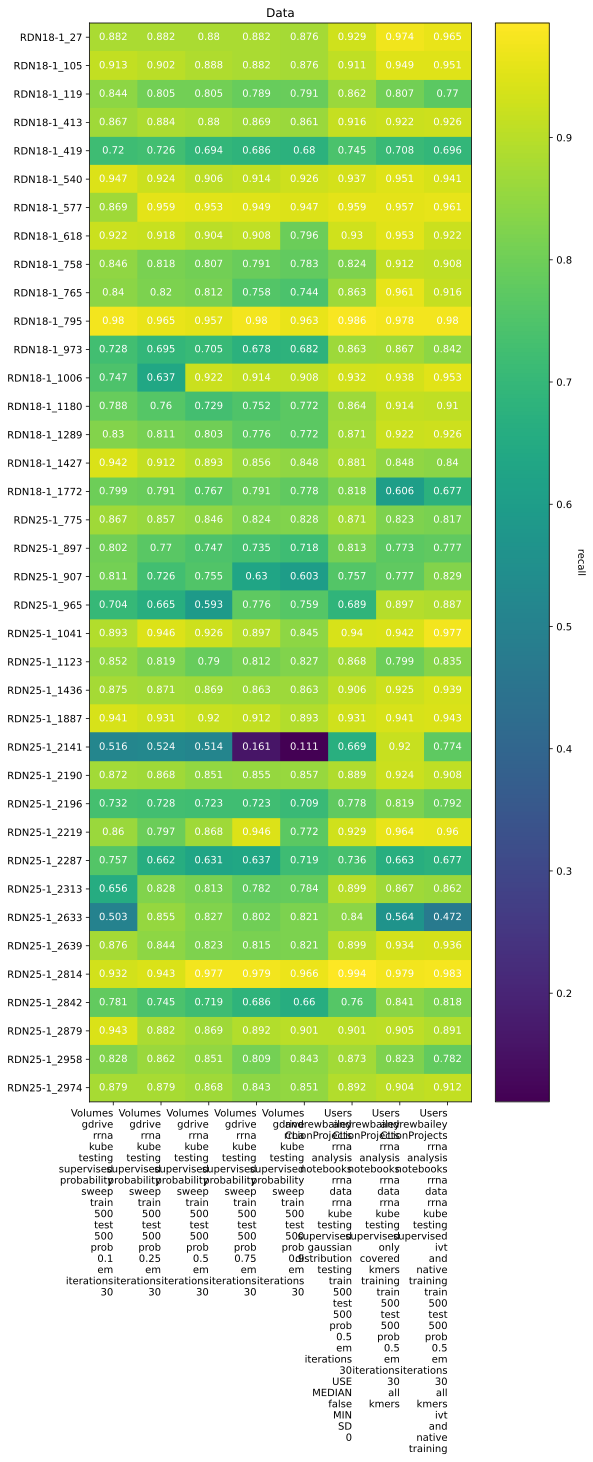

In [16]:
plot_acc_heatmap_for_experiment(top_dirs, key, kpm, max_percent=max_percent, min_percent=min_percent, min_delta=min_delta, max_delta=max_delta, round_n=round_n, show_numbers=True, client=client, overwrite=overwrite)

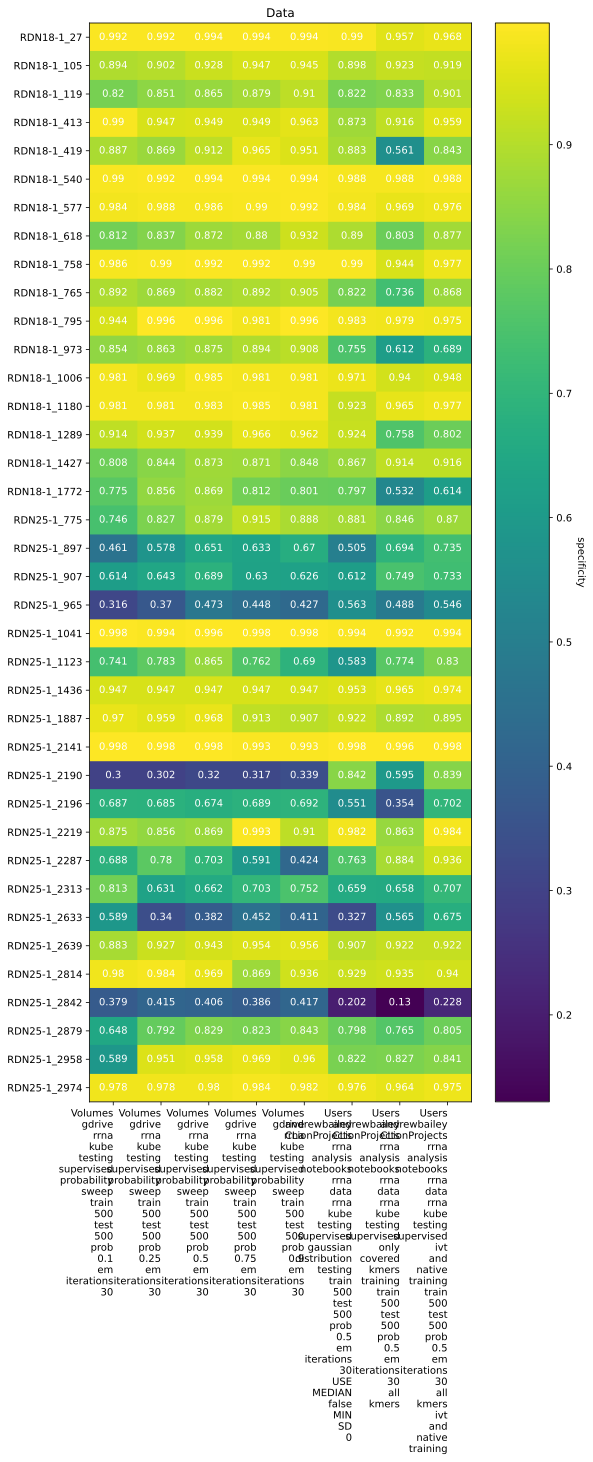

In [17]:
plot_acc_heatmap_for_experiment(top_dirs, "specificity", kpm, max_percent=max_percent, min_percent=min_percent, min_delta=min_delta, max_delta=max_delta, round_n=round_n, show_numbers=True, client=client, overwrite=overwrite)

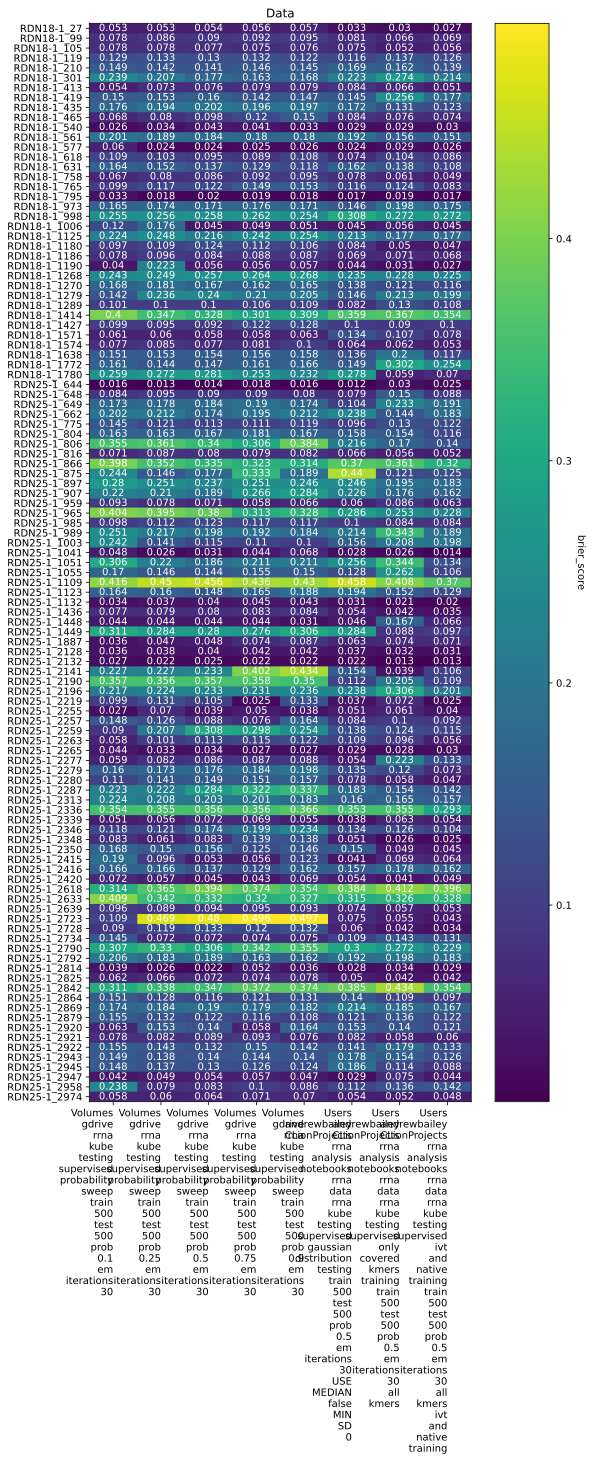

In [20]:
plot_acc_heatmap_for_experiment(top_dirs, "brier_score", kpm, max_percent=max_percent, min_percent=min_percent, min_delta=min_delta, max_delta=max_delta, round_n=round_n, show_numbers=True, client=client, overwrite=overwrite)